# Feature-Based Alignment
## RANdom SAmple Consensus - RANSAC

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# import random
# random.seed(42)

In [33]:
#problem
def ransac_image_alignment(image1, image2, num_iterations=100, tolerance=0.5):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors
    orb = cv2.ORB_create() # you can use sift either or any feature extractors
    keypoints1, descriptors1 = None
    keypoints2, descriptors2 = None

    # Match features using brute force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = None

    # Extract matched keypoints
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    # RANSAC for image alignment
    best_H = None
    max_inliers = 0
    for _ in range(num_iterations):
        # Randomly select 4 points
        indices = None
        src_points = points1[indices]
        dst_points = points2[indices]

        # Compute homography using these points using cv2.findHomography()
        H, _ = None 

        # Warp image1 using the computed homography using cv2.warpPerspective()
        warped_image1 = None 

        # Calculate difference between warped_image1 and image2
        diff = None

        # Calculate the number of inliers (pixels with small differences)
        inliers = None

        # Update best homography if the current one has more inliers
        if inliers > max_inliers:
            best_H = H
            max_inliers = inliers

    # Warp image1 using the best homography
    aligned_image = cv2.warpPerspective(image1, best_H, (image2.shape[1], image2.shape[0]))

    return aligned_image, best_H

In [39]:
def assert_numbers(num1):
    a = [[ 1.00194015e+00, -3.10892923e-04, -1.55221281e+03],
         [-8.44525336e-04,  1.00421937e+00, -4.84116405e+00],
         [-3.18365114e-07,  9.02584731e-07,  1.00000000e+00]]
    try:
        assert sum(sum(num1 == a)) == 9, f"Warning! Assertion failed!"
        print("All tests have passed!")
    except AssertionError as e:
        print(e)

In [42]:
# Align images using RANSAC
image1 = cv2.imread("GlobalAlignment1.JPG")
image2 = cv2.imread("GlobalAlignment2.JPG")
aligned_image, H = ransac_image_alignment(image1, image2)
cv2.imwrite("result.png", aligned_image)

True

In [36]:

def ransac_image_alignment(image1, image2, num_iterations=100, tolerance=0.5):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors
    orb = cv2.ORB_create() # you can use sift either or any feature extractors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Match features using brute force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Extract matched keypoints
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    # RANSAC for image alignment
    best_H = None
    max_inliers = 0
    for _ in range(num_iterations):
        # Randomly select 4 points
        indices = np.random.choice(len(matches), 4, replace=False)
        src_points = points1[indices]
        dst_points = points2[indices]

        # Compute homography using these points
        H, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, tolerance)

        # Warp image1 using the computed homography
        warped_image1 = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))

        # Calculate difference between warped_image1 and image2
        diff = np.abs(warped_image1.astype(np.float32) - image2.astype(np.float32))

        # Calculate the number of inliers (pixels with small differences)
        inliers = np.sum(np.all(diff < tolerance, axis=2))

        # Update best homography if the current one has more inliers
        if inliers > max_inliers:
            best_H = H
            max_inliers = inliers

    # Warp image1 using the best homography
    aligned_image = cv2.warpPerspective(image1, best_H, (image2.shape[1], image2.shape[0]))

    return aligned_image, best_H

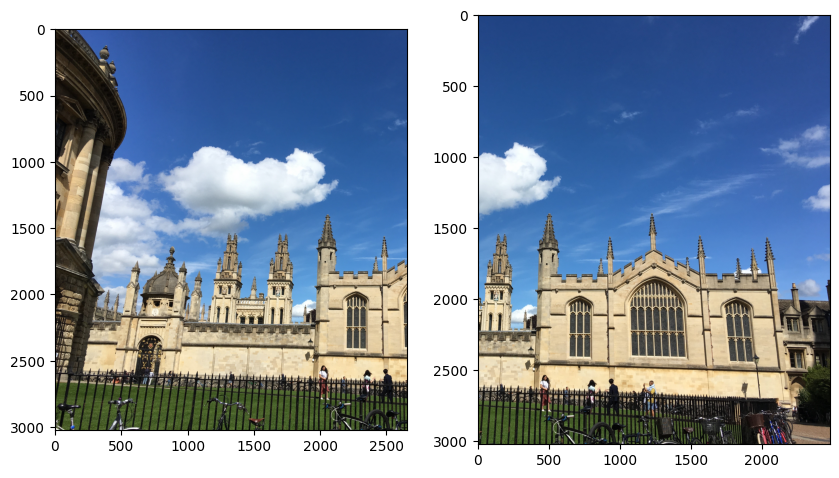

In [7]:
image1 = cv2.imread("GlobalAlignment1.JPG")
image2 = cv2.imread("GlobalAlignment2.JPG")
f, axis_array = plt.subplots(1,2, figsize=(10,8))
axis_array[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axis_array[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Align images using RANSAC
aligned_image, H = ransac_image_alignment(image1, image2)

In [6]:
print(H)

[[ 1.00017638e+00 -6.63042709e-04 -1.54916164e+03]
 [ 1.70906468e-03  9.97338221e-01  1.32033556e+00]
 [ 7.22914999e-07 -8.63829944e-07  1.00000000e+00]]


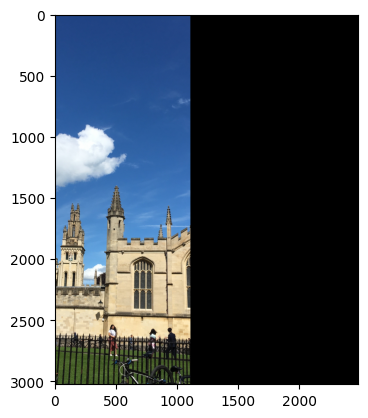

In [5]:
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))